In [1]:
import numpy
from matplotlib import pyplot

import calibr8

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### The Exponential Model
The exponential function is a rather simple formula that can be applied to quite a number of real-world problems.
This example demonstrates how the `calibr8.exponential` model can describe four commonly seen trends in real world data.

It is available through base models such as `calibr8.BaseExponentialModelN` and `calibr8.BaseExponentialModelT`, but this example won't go into detail with these and just look at the underlying `calibr8.exponential` function.

A picture says more than a thousand words, so before the details let's see how it looks like:


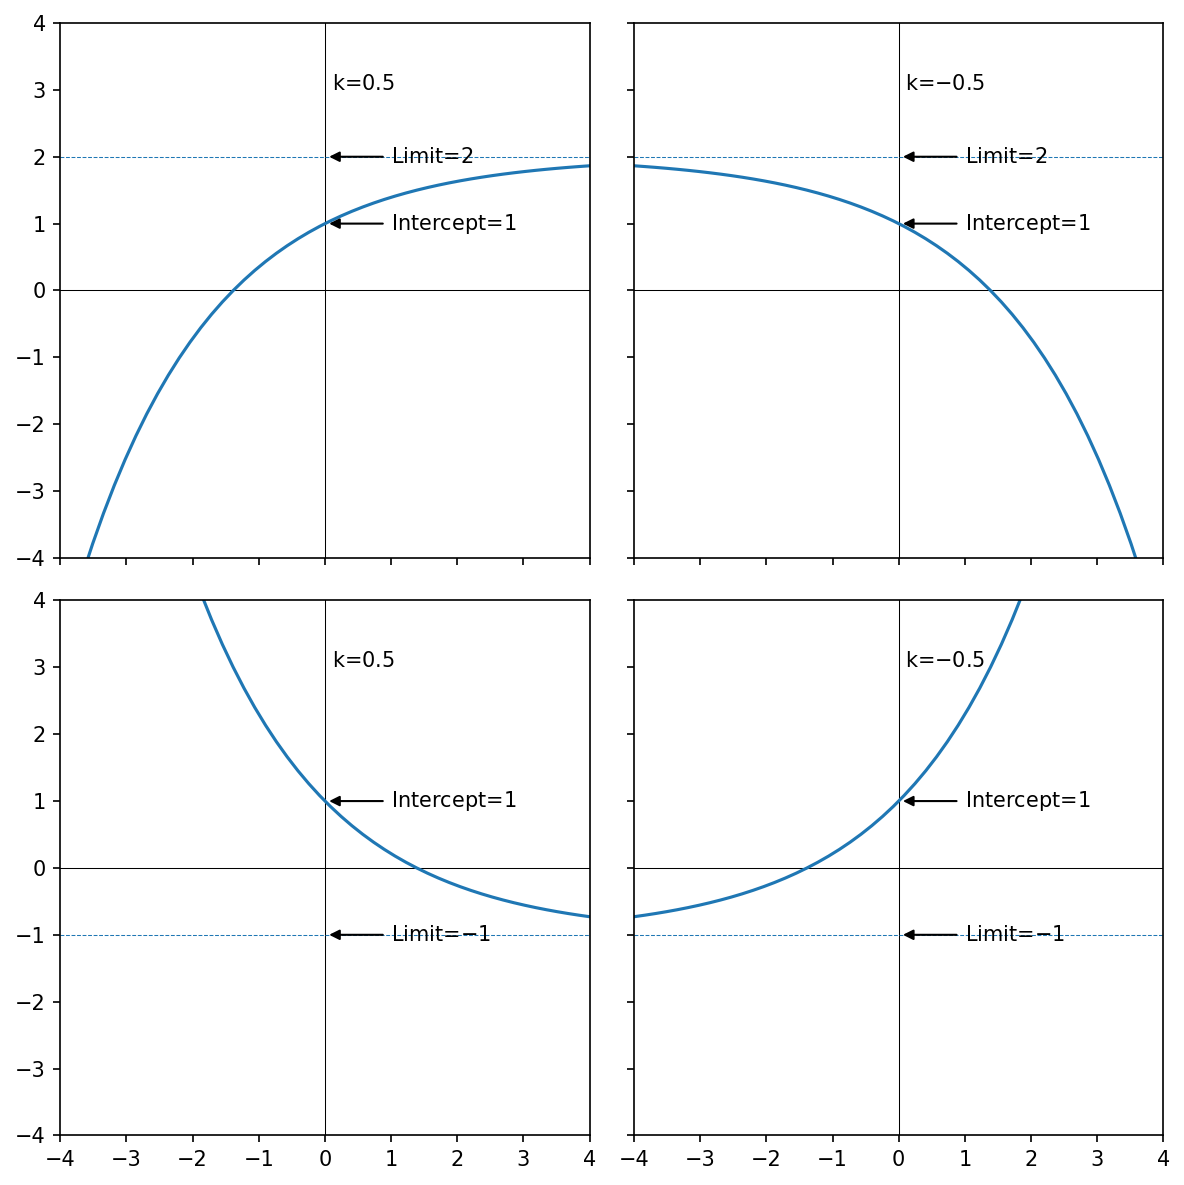

In [2]:
B = 4
x = numpy.linspace(-B, B)

fig, axs = pyplot.subplots(ncols=2, nrows=2, figsize=(8, 8), dpi=150, sharex=True, sharey=True)

for ax, theta in zip(axs.flatten(), [
    (1, 2, 0.5),
    (1, 2, -0.5),
    (1, -1, 0.5),
    (1, -1, -0.5),
]):
    ax.axhline(0, color="black", lw=0.5)
    ax.axvline(0, color="black", lw=0.5)
    ax.plot(x, calibr8.exponential(x, theta))
    I, L, k = theta
    ax.axhline(L, ls="--", lw=0.5)
    ax.annotate(
        f"Limit=${L}$",
        xy=(0, L), xytext=(1, L),
        va="center",
        arrowprops=dict(arrowstyle="-|>", color="black")
    )
    ax.annotate(
        f"Intercept=${I}$",
        xy=(0, I), xytext=(1, I),
        va="center",
        arrowprops=dict(arrowstyle="-|>", color="black")
    )
    ax.text(s=f"k=${k}$", x=0.1, y=3)
    ax.set(
        ylim=(-B, B),
        xlim=(-B, B),
    )
fig.tight_layout()
pyplot.show()

As you can see from the code and figure above, all flavors have the shape of a simple e-function, but it's shifted, scaled and flipped around depending on:
* Is the y-axis intercept `I` above, `or` below the asymptotic limit `L`?
* Is the rate parameter `k` positive `or` negative?

We can have exactly four combinations of answers to these two `or` questions, that's why we got four shapes.

The `calibr8.exponential` model is implemented as...

$$ I + (L-I) \cdot (1-e^{-k \cdot x}) $$

...because this way, the most common shape (approaching a limit from below) is obtained from all-positive parameters.

But as we saw above, each paramter has a real-valued support:

| parameter     | interpretation
| ----- | -- |
| $$I \in \mathcal{R} $$ | y-axis intercept |
| $$L \in \mathcal{R} $$ | asymptotic limit |
| $$k \in \mathcal{R} $$ | exponential rate parameter |

In [3]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Feb 23 2022

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.31.0

matplotlib: 3.5.1
sys       : 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:22:46) [MSC v.1916 64 bit (AMD64)]
calibr8   : 6.4.0
numpy     : 1.20.3

Watermark: 2.3.0

